
1. What is the demographic profile of the customer base?
2. How much is being spent across each transaction type?
3. Does online transactional spend differ over time and by customer age?
4. What is the average monthly spend per user by customer age category?
5. What is the relationship between transaction frequency and FICO?
6. What is the average spend value by customer location?
7. Is there a direct relationship between income and spending?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.ticker import FuncFormatter, MaxNLocator
import us


pd.options.display.float_format = "{:,.2f}".format

pd.options.display.max_columns=None
pd.options.display.expand_frame_repr = False

from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))


/var/folders/y7/pkyxqbyj6973wsz_tt5b7sqr0000gn/T/ipykernel_9281/1466314309.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
txn = pd.read_csv('downloads/cc_transactions.csv')


In [3]:
txn.head(50)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,"91,750.00",5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,"91,754.00",5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,"91,754.00",5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,"91,754.00",5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,"91,750.00",5912,NaN,No
5,0,0,2002,9,3,13:53,$86.19,Swipe Transaction,-7146670748125200898,Monterey Park,CA,"91,755.00",5970,NaN,No
6,0,0,2002,9,4,05:51,$93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,"91,754.00",5411,NaN,No
7,0,0,2002,9,4,06:09,$123.50,Swipe Transaction,-727612092139916043,Monterey Park,CA,"91,754.00",5411,NaN,No
8,0,0,2002,9,5,06:14,$61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,"91,754.00",5411,NaN,No
9,0,0,2002,9,5,09:35,$57.10,Swipe Transaction,4055257078481058705,La Verne,CA,"91,750.00",7538,NaN,No


In [4]:
txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


In [5]:
# change Amount column to float dtype

txn["Amount"] = txn["Amount"].str.replace("$", "", regex=False).astype(float)

txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          float64
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(2), int64(7), object(6)
memory usage: 2.7+ GB


In [6]:
print(sorted(txn["Year"].unique()))

[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [7]:
# I only want to take the most recent 5 years of data for analysis

txn = txn[txn["Year"] > 2015]
txn

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4136,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,CA,"91,750.00",7538,NaN,No
4137,0,0,2016,1,4,06:43,40.02,Chip Transaction,-34551508091458520,La Verne,CA,"91,750.00",5912,NaN,No
4138,0,0,2016,1,7,09:30,54.11,Chip Transaction,4055257078481058705,La Verne,CA,"91,750.00",7538,NaN,No
4139,0,0,2016,1,7,16:03,89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,"91,754.00",5651,NaN,No
4140,0,0,2016,1,10,06:38,29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,"91,755.00",5942,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No
24386896,1999,1,2020,2,27,22:24,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No
24386897,1999,1,2020,2,28,07:43,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No
24386898,1999,1,2020,2,28,20:10,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No


In [8]:
for col in txn.columns:
    print(f'{col}: {txn[col].nunique()}')

User: 1964
Card: 9
Year: 5
Month: 12
Day: 31
Time: 1440
Amount: 64640
Use Chip: 3
Merchant Name: 62810
Merchant City: 11334
Merchant State: 171
Zip: 22832
MCC: 109
Errors?: 21
Is Fraud?: 2


In [9]:
# check for NaN and duplicates
print(txn.isna().sum())

print(f'\nThere are {txn.duplicated().sum()} duplicates.')

User                    0
Card                    0
Year                    0
Month                   0
Day                     0
Time                    0
Amount                  0
Use Chip                0
Merchant Name           0
Merchant City           0
Merchant State     903702
Zip                952171
MCC                     0
Errors?           7100050
Is Fraud?               0
dtype: int64

There are 16 duplicates.


In [10]:
# drop duplicate rows, and validate that duplicates are dropped
txn = txn.drop_duplicates()
print(f'\nThere are {txn.duplicated().sum()} duplicates.')


There are 0 duplicates.


In [11]:
# there are negative values in Amount
# will analyse and determine if there is a need to remove them 

negative_amt = txn[txn["Amount"] <1]
print(negative_amt.head(50))
print(f'There are {negative_amt.shape[0]} rows with negative amount values.')


      User  Card  Year  Month  Day   Time  Amount          Use Chip        Merchant Name Merchant City Merchant State       Zip   MCC  Errors? Is Fraud?
4165     0     0  2016      2   23  13:33  -52.00  Chip Transaction -1288082279022882052      La Verne             CA 91,750.00  5499      NaN        No
4182     0     0  2016      3   30  13:20  -77.00  Chip Transaction  2027553650310142703     Mira Loma             CA 91,752.00  5541      NaN        No
4208     0     0  2016      5   24  14:20  -62.00  Chip Transaction -5162038175624867091      Kingston        Jamaica       NaN  5541      NaN        No
4219     0     0  2016      6   16  13:41  -88.00  Chip Transaction  2027553650310142703     Mira Loma             CA 91,752.00  5541      NaN        No
4249     0     0  2016      8    7  13:27  -92.00  Chip Transaction -1288082279022882052      La Verne             CA 91,750.00  5499      NaN        No
4328     0     0  2016     12   10  19:58 -123.00  Chip Transaction -1908131910424

In [12]:
# I will drop rows with negative amount as they might be refunds, and will affect spending calculations 

txn = txn[txn["Amount"]>0]
txn

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4136,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,CA,"91,750.00",7538,NaN,No
4137,0,0,2016,1,4,06:43,40.02,Chip Transaction,-34551508091458520,La Verne,CA,"91,750.00",5912,NaN,No
4138,0,0,2016,1,7,09:30,54.11,Chip Transaction,4055257078481058705,La Verne,CA,"91,750.00",7538,NaN,No
4139,0,0,2016,1,7,16:03,89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,"91,754.00",5651,NaN,No
4140,0,0,2016,1,10,06:38,29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,"91,755.00",5942,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386894,1999,1,2020,2,27,22:18,63.43,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No
24386896,1999,1,2020,2,27,22:24,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No
24386897,1999,1,2020,2,28,07:43,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No
24386898,1999,1,2020,2,28,20:10,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No


In [13]:
users = pd.read_csv('downloads/users.csv')
users

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.00,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.00,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Person                       2000 non-null   object 
 1   Current Age                  2000 non-null   int64  
 2   Retirement Age               2000 non-null   int64  
 3   Birth Year                   2000 non-null   int64  
 4   Birth Month                  2000 non-null   int64  
 5   Gender                       2000 non-null   object 
 6   Address                      2000 non-null   object 
 7   Apartment                    528 non-null    float64
 8   City                         2000 non-null   object 
 9   State                        2000 non-null   object 
 10  Zipcode                      2000 non-null   int64  
 11  Latitude                     2000 non-null   float64
 12  Longitude                    2000 non-null   float64
 13  Per Capita Income 

In [15]:
print(users.isna().sum())

print(f'\nThere are {users.duplicated().sum()} duplicates.')


Person                            0
Current Age                       0
Retirement Age                    0
Birth Year                        0
Birth Month                       0
Gender                            0
Address                           0
Apartment                      1472
City                              0
State                             0
Zipcode                           0
Latitude                          0
Longitude                         0
Per Capita Income - Zipcode       0
Yearly Income - Person            0
Total Debt                        0
FICO Score                        0
Num Credit Cards                  0
dtype: int64

There are 0 duplicates.


### Merge the tables 

In [16]:
# Add a column for age categories, will be used further down 
# Convert "Current Age" to string, remove the last digit using .str[:-1], then append "0s" to form an age category (e.g., "20s", "30s")
users["Age Category"] = users["Current Age"].astype(str).str[:-1] + "0s"

# Define the order for age categories, since 100s will be ordered as 1st if order is not defined
age_order = [f"{i}s" for i in range(10, 101, 10)]  # ['10s', '20s', ..., '100s']
users["Age Category"] = pd.Categorical(users["Age Category"], categories=age_order, ordered=True)


print(sorted(users["Age Category"].unique()))

['100s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']


In [17]:
# combine users and txn dataset 
df = pd.merge(txn, users, how = "inner", left_on = "User", right_index = True)

# remove $ from string values in necessary columns, and convert to float dtype
df["Per Capita Income - Zipcode"] = df["Per Capita Income - Zipcode"].str.replace(r"[\$,]", "", regex=True).astype(float)
df["Yearly Income - Person"] = df["Yearly Income - Person"].str.replace(r"[\$,]", "", regex=True).astype(float)
df["Total Debt"] = df["Total Debt"].str.replace(r"[\$,]", "", regex=True).astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6861049 entries, 4136 to 24386899
Data columns (total 34 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   User                         int64   
 1   Card                         int64   
 2   Year                         int64   
 3   Month                        int64   
 4   Day                          int64   
 5   Time                         object  
 6   Amount                       float64 
 7   Use Chip                     object  
 8   Merchant Name                int64   
 9   Merchant City                object  
 10  Merchant State               object  
 11  Zip                          float64 
 12  MCC                          int64   
 13  Errors?                      object  
 14  Is Fraud?                    object  
 15  Person                       object  
 16  Current Age                  int64   
 17  Retirement Age               int64   
 18  Birth Year             

In [18]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Age Category
4136,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,CA,"91,750.00",7538,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s
4137,0,0,2016,1,4,06:43,40.02,Chip Transaction,-34551508091458520,La Verne,CA,"91,750.00",5912,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s
4138,0,0,2016,1,7,09:30,54.11,Chip Transaction,4055257078481058705,La Verne,CA,"91,750.00",7538,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s
4139,0,0,2016,1,7,16:03,89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,"91,754.00",5651,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s
4140,0,0,2016,1,10,06:38,29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,"91,755.00",5942,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386894,1999,1,2020,2,27,22:18,63.43,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s
24386896,1999,1,2020,2,27,22:24,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s
24386897,1999,1,2020,2,28,07:43,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s
24386898,1999,1,2020,2,28,20:10,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s


## 1. What is the demographic profile of the customer base?


In [19]:
# get ID of all users in past 5 years 
cus_in_past_5_years = df["User"].unique()

# filter users dataset to get only all customers from last 5 years
users_df = users[users.index.isin(cus_in_past_5_years)]

users_df

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Age Category
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5,50s
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5,50s
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5,80s
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4,60s
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1,40s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.00,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3,30s
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.00,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4,60s
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3,40s
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1,60s


/var/folders/y7/pkyxqbyj6973wsz_tt5b7sqr0000gn/T/ipykernel_9281/2604110468.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic = users_df.groupby("Age Category")["Gender"].value_counts().unstack(fill_value=0)
/var/folders/y7/pkyxqbyj6973wsz_tt5b7sqr0000gn/T/ipykernel_9281/2604110468.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_value = demographic['Male'][i]
/var/folders/y7/pkyxqbyj6973wsz_tt5b7sqr0000gn/T/ipykernel_9281/2604110468.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

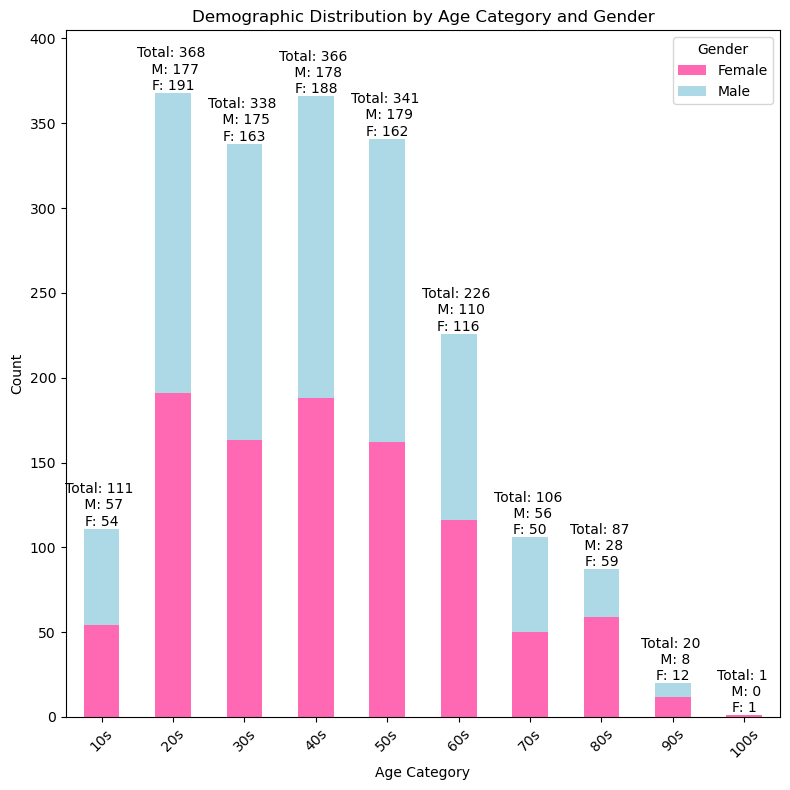

In [20]:
# Group the data by "Age Category" and "Gender", then count occurrences of each gender in each age category
demographic = users_df.groupby("Age Category")["Gender"].value_counts().unstack(fill_value=0)


# Create color dictionary for gender
color_dict = {'Female': 'hotpink', 'Male': '#ADD8E6'}

# Create the stacked bar plot
ax = demographic.plot(kind="bar", stacked=True, figsize=(8, 8), color=color_dict)

def millions_formatter(x, pos):
    return f'{x:,.0f}'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add value labels at the top of stacked bars
for i in range(len(demographic.index)):
    male_value = demographic['Male'][i]
    female_value = demographic['Female'][i]
    # Calculate the total height for positioning
    total_height = male_value + female_value
    # Add both labels at the top
    ax.text(i, total_height, f'Total: {total_height} \n M: {male_value:,.0f}\nF: {female_value:,.0f}', 
            ha='center', va='bottom')

plt.title("Demographic Distribution by Age Category and Gender")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Add padding to prevent label cutoff
plt.margins(y=0.1)

plt.tight_layout()
plt.show()

## 2. How much is being spent across each transaction type?


In [21]:
type_spending = df.groupby("Use Chip")["Amount"].agg("sum").apply(lambda x: f"{x:.2f}")
type_spending


Use Chip
Chip Transaction      236385920.15
Online Transaction     50986086.80
Swipe Transaction      57329102.52
Name: Amount, dtype: object

## 3. Does online transactional spend differ over time and by customer age?

In [22]:
# create a column combing year and month
df["year_month"] = df["Year"].astype(str) + "-" + df["Month"].astype(str)
df["year_month"] = pd.to_datetime(df["year_month"]).dt.to_period('M')

# create a dataset of online transactions
online = df[df["Use Chip"] == "Online Transaction"] 


In [23]:
online_grouped = online.groupby(["Age Category", "year_month"])["Amount"].agg("sum").reset_index()
online_grouped

/var/folders/y7/pkyxqbyj6973wsz_tt5b7sqr0000gn/T/ipykernel_9281/578625524.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  online_grouped = online.groupby(["Age Category", "year_month"])["Amount"].agg("sum").reset_index()


,Age Category,year_month,Amount
0,10s,2016-01,0.00
1,10s,2016-02,0.00
2,10s,2016-03,0.00
3,10s,2016-04,0.00
4,10s,2016-05,0.00
...,...,...,...
495,100s,2019-10,0.00
496,100s,2019-11,152.21
497,100s,2019-12,67.38
498,100s,2020-01,8.85


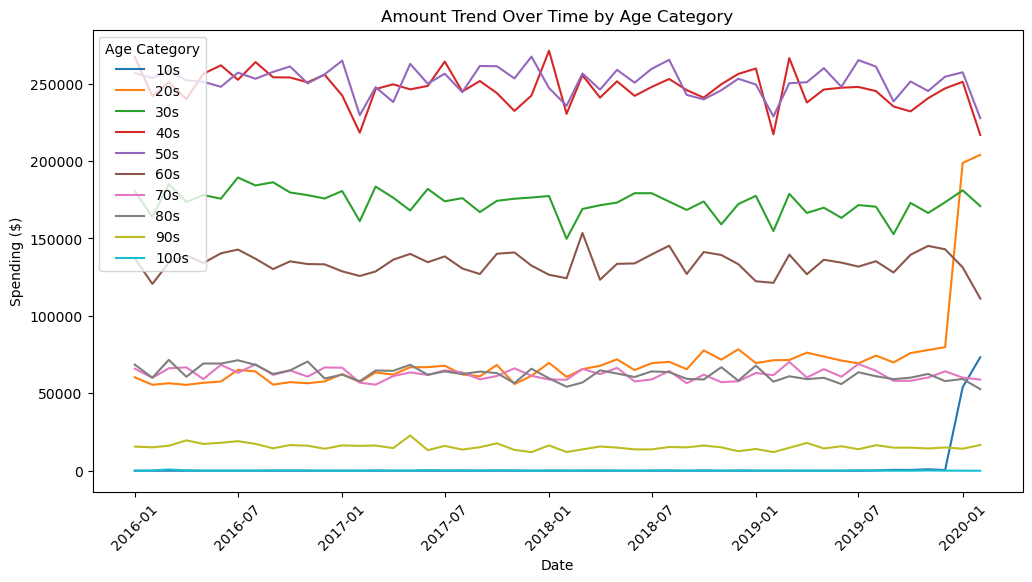

In [24]:
# convert column to datetime, since seaborn cannot handle period[M] format 
online_grouped["year_month"] = online_grouped["year_month"].dt.to_timestamp()


plt.figure(figsize=(12, 6))

sns.lineplot(data=online_grouped, x="year_month", y="Amount", hue="Age Category")

plt.xticks(rotation=45)  
plt.title("Amount Trend Over Time by Age Category")
plt.xlabel("Date")
plt.ylabel("Spending ($)")
plt.legend(title="Age Category")

plt.show()


 - Online spending largely does not differ over time. Only 10s & 20s show a sharp increase towards end of 2019. 
 - Most of the other age groups have a steady rate of spending across the 5 years, with a slight decrease observed in most groups towards the end of 2019. 
 - The age group do have differing amounts of spending, this can be observed in the graph, where the spending tends to be hovering in the same range across the 5 years

## 4. What is the average monthly spend per user by customer age category?


In [25]:
# Group the dataset by "Age Category" and apply aggregation functions
# Sum of total spending in each Age Category
# Count of unique users in each Age Category
group_spend = df.groupby(["Age Category"]).agg({
    "Amount": "sum",  
    "User": "nunique"  
})

print(group_spend)

# Calculate the average monthly spend per user in each Age Category
# - df["year_month"].nunique(): Total number of unique months in the dataset\
avg_monthly_spend = group_spend["Amount"] / group_spend["User"] / df["year_month"].nunique()
avg_monthly_spend = avg_monthly_spend.rename("Average Spend")
avg_monthly_spend = avg_monthly_spend.to_frame().reset_index()

print(f'\n{avg_monthly_spend}')

/var/folders/y7/pkyxqbyj6973wsz_tt5b7sqr0000gn/T/ipykernel_9281/3057038045.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_spend = df.groupby(["Age Category"]).agg({


                    Amount  User
Age Category                    
10s             834,867.35   111
20s          20,617,085.04   368
30s          64,467,813.08   338
40s          82,309,271.46   366
50s          78,304,568.57   341
60s          48,816,262.43   226
70s          24,522,538.38   106
80s          19,131,150.26    87
90s           5,460,219.58    20
100s            237,333.32     1

  Age Category  Average Spend
0          10s         150.43
1          20s       1,120.49
2          30s       3,814.66
3          40s       4,497.77
4          50s       4,592.64
5          60s       4,320.02
6          70s       4,626.89
7          80s       4,397.97
8          90s       5,460.22
9         100s       4,746.67


## 5. What is the relationship between customer behavior and FICO?

- I will break this into 2 parts 
    1. Customer average monthly spending
        - Do customers with higher FICO spend more?
    2. Customer average transaction frequency
        - Do customers with higher FICO transact more?
    3. Explore if there might be a relationship between FICO and errors in transactions
        - Specifically for "Insufficient balance" errors

In [26]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Age Category,year_month
4136,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,CA,"91,750.00",7538,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01
4137,0,0,2016,1,4,06:43,40.02,Chip Transaction,-34551508091458520,La Verne,CA,"91,750.00",5912,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01
4138,0,0,2016,1,7,09:30,54.11,Chip Transaction,4055257078481058705,La Verne,CA,"91,750.00",7538,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01
4139,0,0,2016,1,7,16:03,89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,"91,754.00",5651,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01
4140,0,0,2016,1,10,06:38,29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,"91,755.00",5942,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386894,1999,1,2020,2,27,22:18,63.43,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s,2020-02
24386896,1999,1,2020,2,27,22:24,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s,2020-02
24386897,1999,1,2020,2,28,07:43,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s,2020-02
24386898,1999,1,2020,2,28,20:10,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s,2020-02


In [36]:
fico_scores = {
    (800, 850): "Exceptional",
    (740, 799): "Very Good",
    (670, 739): "Good",
    (580, 669): "Fair",
    (300, 579): "Poor"
}



# function for checking FICO score and giving value based on dictionary
def scoring_fico(score):
    for range_tuple, rating in fico_scores.items():
        if range_tuple[0] <= score <= range_tuple[1]:
            return rating

df["FICO rating"] = df["FICO Score"].apply(scoring_fico)

fico_order = ["Exceptional", "Very Good", "Good", "Fair", "Poor"]
df["FICO rating"] = pd.Categorical(df["FICO rating"], categories = fico_order , ordered = True)
# age_order = [f"{i}s" for i in range(10, 101, 10)]  # ['10s', '20s', ..., '100s']
# users["Age Category"] = pd.Categorical(users["Age Category"], categories=age_order, ordered=True)


In [44]:
fico_spend = df.groupby("FICO rating").agg({"Amount":"sum", "User":"nunique", ""})
fico_spend["Avg spend"] = fico_spend["Amount"] / fico_spend["User"]
fico_spend

/var/folders/y7/pkyxqbyj6973wsz_tt5b7sqr0000gn/T/ipykernel_9281/3008115981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fico_spend = df.groupby("FICO rating").agg({"Amount":"sum", "User":"nunique"})


,Amount,User,Avg spend
FICO rating,,,
Exceptional,"29,109,453.34",166,"175,358.15"
Very Good,"81,356,967.68",467,"174,211.92"
Good,"163,988,766.00",919,"178,442.62"
Fair,"55,978,776.85",336,"166,603.50"
Poor,"14,267,145.60",76,"187,725.60"


- Customers with higher FICO do not spend more. 
- Customers with the lowest FICO scores actually had the highest average spending. 

## 6. What is the Top 15 average spend value by customer location?

- Provide the top 15 states witht the highest average spend value

In [29]:
# calculate total spending per state, divide by months to get average spend per month 
total_state_spend = (df.groupby("State")["Amount"].sum()) / df["year_month"].nunique()
total_state_spend

# calculate total users per state 
state_num = users_df.groupby("State")["Person"].count()
state_num

# merge the data together
state_df = pd.merge(total_state_spend, state_num, left_index=True, right_index=True, how="inner")


top_15_states = state_df.sort_values(by = "Amount", ascending = False).head(15).reset_index()
top_15_states = top_15_states.rename(columns = {"Amount" : f"Avg monthly spend per customer", "Person":"Num of customers in State"})
print(top_15_states)

state_mapping = {state.abbr: state.name for state in us.states.STATES}


top_15_states["State"] = top_15_states["State"].map(state_mapping)
top_15_states

   State  Avg monthly spend per customer  Num of customers in State
0     CA                      845,714.98                        238
1     TX                      589,011.45                        157
2     NY                      503,381.74                        124
3     FL                      425,517.49                        130
4     PA                      285,760.82                         83
5     OH                      269,228.03                         84
6     IL                      258,872.80                         82
7     NC                      238,289.63                         76
8     NJ                      228,832.70                         53
9     GA                      193,280.59                         65
10    TN                      191,103.37                         51
11    VA                      173,919.97                         43
12    MA                      169,803.25                         40
13    MI                      169,486.44        

,State,Avg monthly spend per customer,Num of customers in State
0,California,"845,714.98",238
1,Texas,"589,011.45",157
2,New York,"503,381.74",124
3,Florida,"425,517.49",130
4,Pennsylvania,"285,760.82",83
5,Ohio,"269,228.03",84
6,Illinois,"258,872.80",82
7,North Carolina,"238,289.63",76
8,New Jersey,"228,832.70",53
9,Georgia,"193,280.59",65


## 7. Is there a direct relationship between income and spending?

In [30]:
# create a dataset of users with their income and total spending
user_income_grouped = df.groupby(["User","Yearly Income - Person"])["Amount"].sum().reset_index()
user_income_grouped["Avg monthly spend"] = user_income_grouped["Amount"] / df["year_month"].nunique()
user_income_grouped = user_income_grouped.rename(columns = {"Amount":"Total Spend"})

user_income_grouped
user_income_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User                    1964 non-null   int64  
 1   Yearly Income - Person  1964 non-null   float64
 2   Total Spend             1964 non-null   float64
 3   Avg monthly spend       1964 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 61.5 KB


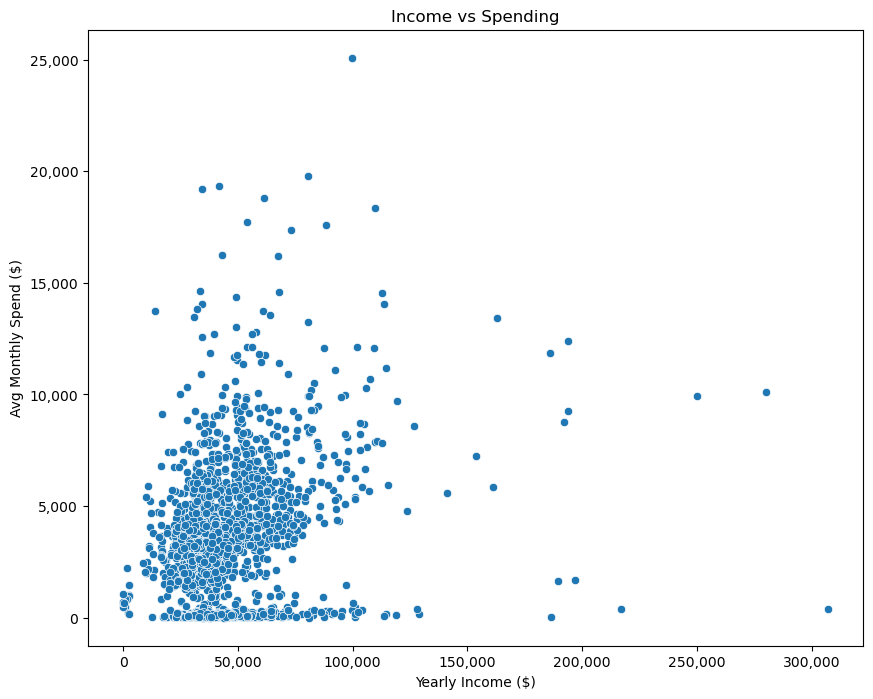

In [31]:
plt.figure(figsize = (10,8))

sns.scatterplot(user_income_grouped, x="Yearly Income - Person" , y = "Avg monthly spend")

def thousands_formatter(x, pos):
    return f"{int(x):,}"

formatter = FuncFormatter(thousands_formatter)

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Income vs Spending")

plt.xlabel("Yearly Income ($)")
plt.ylabel("Avg Monthly Spend ($)")

plt.show()

There appears to be little relationship between income and monthly spending. 

I will explore further by breaking it down into age groups.  

In [32]:
only_keep = ["Age Category"]
user_income_grouped = pd.merge(user_income_grouped, users_df[only_keep], left_on = "User", right_index = True)

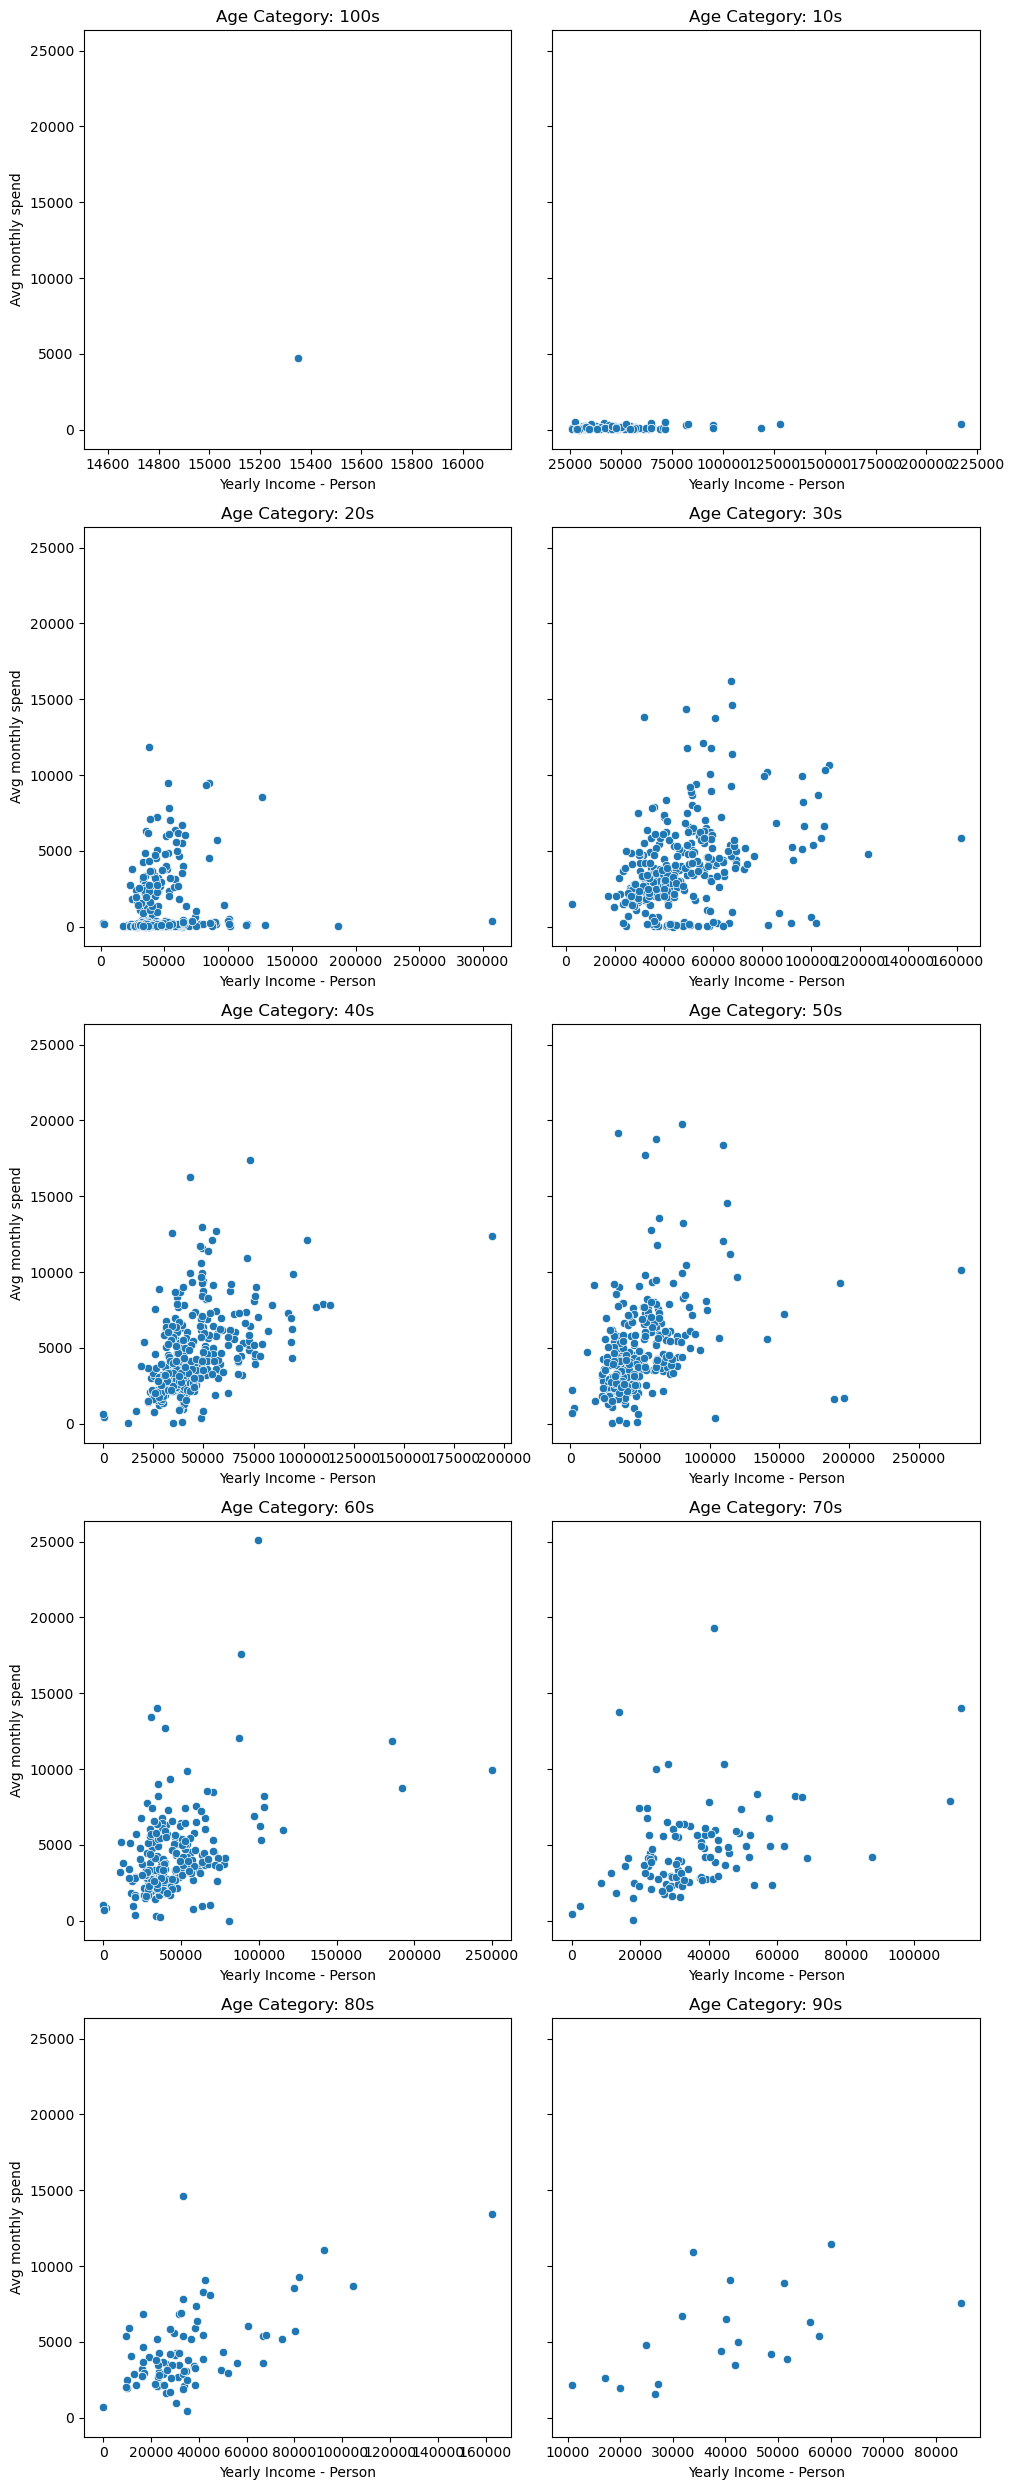

In [33]:
# Get unique age categories and sort them
age_categories = sorted(user_income_grouped["Age Category"].unique())

# Define no. of columns (2 per row)
num_categories = len(age_categories)
cols = 2
# dynamically calculate required num of rows 
rows = (num_categories + cols - 1) // cols  

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 5), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through the categories and plot each one
for idx in range(num_categories):
    ax = axes[idx]  
    age_plot = user_income_grouped[user_income_grouped["Age Category"] == age_categories[idx]]
    sns.scatterplot(data=age_plot, x="Yearly Income - Person", y="Avg monthly spend", ax=ax)
    ax.set_title(f"Age Category: {age_categories[idx]}")

plt.tight_layout()
plt.show()


 - Even when broken down into individual age groups, there appears to be little correlation between Yearly income and average monthly spending

In [34]:
print(df["Errors?"].unique())

[nan 'Insufficient Balance' 'Bad PIN' 'Technical Glitch' 'Bad Expiration'
 'Bad Card Number' 'Bad CVV' 'Bad Card Number,Insufficient Balance'
 'Bad Card Number,Bad CVV' 'Bad PIN,Insufficient Balance' 'Bad Zipcode'
 'Insufficient Balance,Technical Glitch' 'Bad PIN,Technical Glitch'
 'Bad Card Number,Bad Expiration' 'Bad CVV,Insufficient Balance'
 'Bad Expiration,Insufficient Balance' 'Bad Expiration,Bad CVV'
 'Bad Expiration,Technical Glitch' 'Bad Zipcode,Technical Glitch'
 'Bad Zipcode,Insufficient Balance' 'Bad CVV,Technical Glitch'
 'Bad Card Number,Technical Glitch']


In [35]:
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Age Category,year_month,FICO rating
4136,0,0,2016,1,3,10:48,66.48,Chip Transaction,-3345936507911876459,La Verne,CA,"91,750.00",7538,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01,Very Good
4137,0,0,2016,1,4,06:43,40.02,Chip Transaction,-34551508091458520,La Verne,CA,"91,750.00",5912,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01,Very Good
4138,0,0,2016,1,7,09:30,54.11,Chip Transaction,4055257078481058705,La Verne,CA,"91,750.00",7538,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01,Very Good
4139,0,0,2016,1,7,16:03,89.48,Chip Transaction,3414527459579106770,Monterey Park,CA,"91,754.00",5651,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01,Very Good
4140,0,0,2016,1,10,06:38,29.15,Chip Transaction,-5475680618560174533,Monterey Park,CA,"91,755.00",5942,NaN,No,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,"29,278.00","59,696.00","127,613.00",787,5,50s,2016-01,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386894,1999,1,2020,2,27,22:18,63.43,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s,2020-02,Good
24386896,1999,1,2020,2,27,22:24,54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,"3,054.00",5541,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s,2020-02,Good
24386897,1999,1,2020,2,28,07:43,59.15,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s,2020-02,Good
24386898,1999,1,2020,2,28,20:10,43.12,Chip Transaction,2500998799892805156,Merrimack,NH,"3,054.00",4121,NaN,No,Kenia Harris,21,60,1998,11,Female,472 Ocean View Street,NaN,Merrimack,NH,3054,42.86,-71.48,"32,325.00","65,909.00","181,261.00",673,2,20s,2020-02,Good
